# Importações

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from sympy import symbols, diff
from matplotlib import cm #colormap
from math import log


%matplotlib inline 

## Visualização de gráficos 3d

### Minimizando a função 
$$f(x, y) = \frac {1} {3^{-x^2 - y ^ 2} + 1}$$

#### Minimizando
$$f(x,y) = \frac {1}{r+1}$$
Com $r$ igual a $3^{-x^2 - y ^ 2}$

In [2]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [3]:
#Gerando dados
x = np.linspace(start = -2, stop = 2, num = 200)
y = np.linspace(start = -2, stop = 2, num = 200)

x, y = np.meshgrid(x, y)


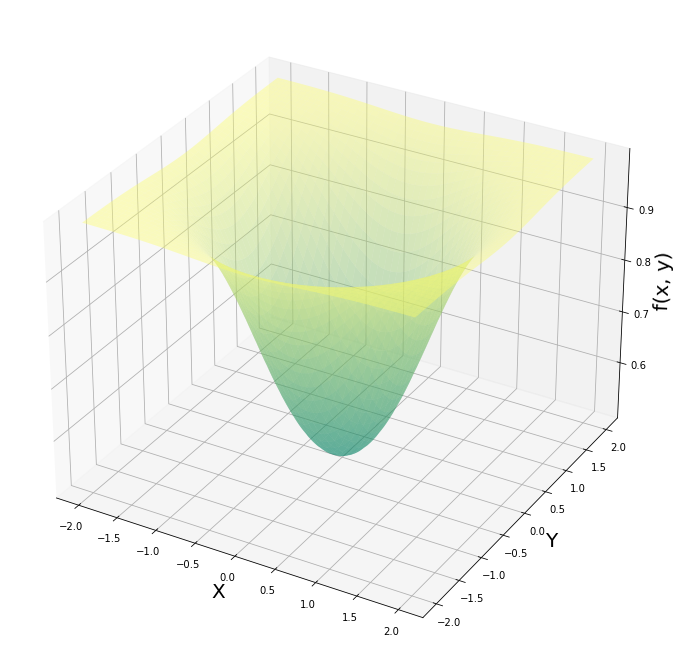

In [4]:
#Gerando grafico 3d


fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection = "3d")

ax.plot_surface(x, y, f(x, y), cmap = cm.summer, alpha = 0.4)
ax.set_xlabel("X", fontsize = 20)
ax.set_ylabel("Y", fontsize = 20)
ax.set_zlabel("f(x, y)", fontsize = 20)

plt.show()

## Derivadas Parciais e Computação Simbolica

### $$ \frac {\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3 ^ {-x^2 - y^2}}{(3^{-x^2 -y^2} + 1)^2}$$

### $$ \frac {\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3 ^ {-x^2 - y^2}}{\left(3^{-x^2 -y^2} + 1\right)^2}$$

In [5]:
a, b = symbols("x, y")


print("Nossa função custo: ", f(a, b))
print("Derivada parcial de f(a, b) em relação a X: ", diff(f(a, b), a))

print("Valor de f(x, y) com x=1.8 e y=1: ", f(a,b).evalf(subs = {a:1.8, b:1}))

Nossa função custo:  1/(3**(-x**2 - y**2) + 1)
Derivada parcial de f(a, b) em relação a X:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Valor de f(x, y) com x=1.8 e y=1:  0.990604794032582


### Método do gradiente (Gradient descent) com Sympy

In [6]:
#Configuração inicial

multiplicador = 0.1
max_iter = 200
params = np.array([1.8, 1.0])  #INICIAL



for n in range(max_iter):
    gradiente_x = diff(f(a,b), a).evalf(subs = {a:params[0], b:params[1]})
    gradiente_y = diff(f(a,b), b).evalf(subs = {a:params[0], b:params[1]})
    gradientes = np.array([gradiente_x, gradiente_y])
    
    
    params = params - multiplicador * gradientes

    
#Resultados
print("Valores no vetor gradientes: ", gradientes)
print("Menor valor de x: ", params[0])
print("Menor valor de y: ", params[1])
print("Custo: ", f(params[0], params[1]))

Valores no vetor gradientes:  [0.000461440542096373 0.000256355856720208]
Menor valor de x:  0.000793898510134722
Menor valor de y:  0.000441054727852623
Custo:  0.500000226534985


In [7]:
#Derivadas parciais

def fpx(x, y):

    r = 3**(-x**2 - y**2)
    return (2 * x * log(3) * r) / ((r + 1) ** 2)
    
def fpy(x, y):
    
    r = 3**(-x**2 - y**2)
    return (2 * y * log(3) * r) / ((r + 1) ** 2)


In [8]:
# Configuração inicial

multiplicador = 0.1
max_iter = 200
params = np.array([1.8, 1.0])  #INICIAL



for n in range(max_iter):
    gradiente_x = fpx(params[0], params[1])
    gradiente_y = fpy(params[0], params[1])
    gradientes = np.array([gradiente_x, gradiente_y])
    
    
    params = params - multiplicador * gradientes

    
#Resultados
print("Valores no vetor gradientes: ", gradientes)
print("Menor valor de x: ", params[0])
print("Menor valor de y: ", params[1])
print("Custo: ", f(params[0], params[1]))

Valores no vetor gradientes:  [0.00046144 0.00025636]
Menor valor de x:  0.0007938985101347202
Menor valor de y:  0.0004410547278526219
Custo:  0.5000002265349848


## Plotando método gradiente no grafico 3D & Vetores numpy avançados

In [33]:
# Configuração inicial

multiplicador = 0.5
max_iter = 200
params = np.array([1.8, 1.0])  #INICIAL
valores = params.reshape(1, 2)


for n in range(max_iter):
    
    gradiente_x = fpx(params[0], params[1])
    gradiente_y = fpy(params[0], params[1])
    gradientes = np.array([gradiente_x, gradiente_y])
    
    params = params - multiplicador * gradientes
    valores = np.append(valores, params.reshape(1,2), axis = 0)
    
#Resultados
print("Valores no vetor gradientes: ", gradientes)
print("Menor valor de x: ", params[0])
print("Menor valor de y: ", params[1])
print("Custo: ", f(params[0], params[1]))

Valores no vetor gradientes:  [1.56952449e-26 8.71958048e-27]
Menor valor de x:  2.0725232663390205e-26
Menor valor de y:  1.1514018146327904e-26
Custo:  0.5


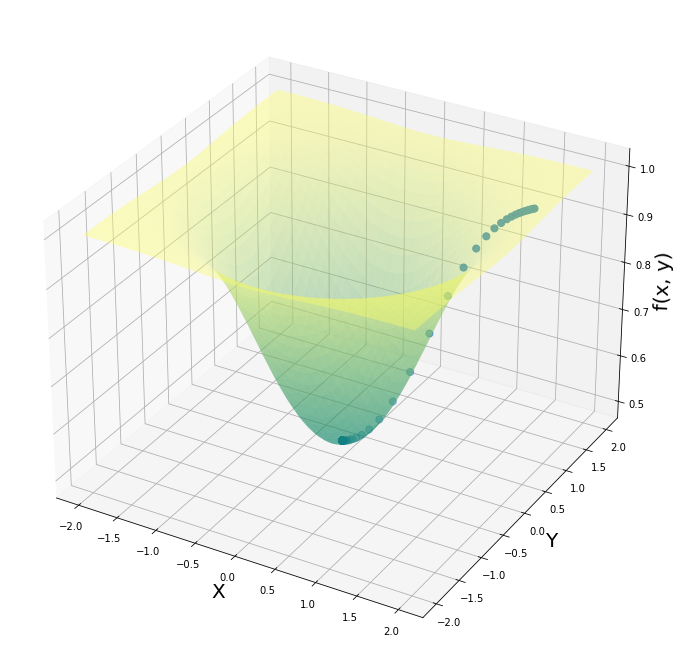

In [34]:
#Gerando grafico 3d


fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection = "3d")


ax.set_xlabel("X", fontsize = 20)
ax.set_ylabel("Y", fontsize = 20)
ax.set_zlabel("f(x, y)", fontsize = 20)


ax.plot_surface(x, y, f(x, y), cmap = cm.summer, alpha = 0.4)
ax.scatter(valores[:, 0], valores[:, 1], f(valores[:, 0], valores[:,1]), s = 50)



plt.show()

In [32]:
#Praticando numpy arrays



kirk = np.array([["Captain", "MC"]])


hs_band = np.array([["Black Thought", "MC"], ["Questlove", "Drums"]])
print("band>>>>", hs_band.shape)

the_roots = np.append(arr = hs_band, values = kirk, axis = 0)


the_roots = np.append(arr = the_roots, values = [["Malik B", "MC"]], axis = 0)
print(the_roots)

print("Nicknames...")
print(the_roots[:, [0]])
print("Funçoes...")
print(the_roots[:, [1]])

band>>>> (2, 2)
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'MC']
 ['Malik B' 'MC']]
Nicknames...
[['Black Thought']
 ['Questlove']
 ['Captain']
 ['Malik B']]
Funçoes...
[['MC']
 ['Drums']
 ['MC']
 ['MC']]
